In [51]:
# Tearing Mode Numerical Solution
# Full Domain (-L, L) w/ Fitzpatrick's Normalizations

using BoundaryValueDiffEq, Plots, LaTeXStrings, OrdinaryDiffEq

In [52]:
L = 15.0
tspan = (-L, L)
@inline f(t) = tanh(t)
@inline ddf(t) = -2 * tanh(t) * sech(t)^2

const k = 0.5
S = 100
γ_guess = 0.01

# provide outer solutions for easier boundary value handling
ψouter(t) = exp(-k * abs(t)) * (1 + f(abs(t)) / k)
ϕouter(t) = ψouter(t) / f(t)
ψouter_prime(t) = -k * sign(t) * exp(-k * abs(t)) * (1 + f(abs(t)) / k) + exp(-k * abs(t)) * (ddf(abs(t)) / k)
ϕouter_prime(t) = ψouter_prime(t) / f(t) - ψouter(t) * ddf(t) / (f(t)^2)

ϕouter_prime (generic function with 1 method)

In [53]:
function tearing!(du, u, p, t)
    ψ, ϕ, ψ1, ϕ1 = u
    γ = p[1]
    du[1] = ψ1
    du[2] = ϕ1
    du[3] = (S * γ + k^2) * ψ - (S * γ * f(t)) * ϕ
    du[4] = ((ddf(t) - f(t) * S * γ) / γ^2) * ψ + ((k^2 * γ^2 + S * γ * f(t)^2) / γ^2) * ϕ
end

tearing! (generic function with 1 method)

In [54]:
# initial state vector at t=-L
initial_guess(t) = [ψouter(t), ϕouter(t), ψouter_prime(t), ϕouter_prime(t), 0.01]

initial_guess (generic function with 1 method)

In [55]:
function bcs!(res, u, p, t)
    res[1] = u[1][1] - ψouter(-L) # ψ(-L) ≈ 0
    res[2] = u[1][2] - ϕouter(-L) # ϕ(-L) ≈ 0
    res[3] = u[end][1] - ψouter(L) # ψ(L) ≈ 0
    res[4] = u[end][2] - ϕouter(L) # ϕ(L) ≈ 0
    res[5] = u(0.0)[1] - 1
end

bcs! (generic function with 1 method)

In [56]:
u0 = 1e-4 * ones(5)

5-element Vector{Float64}:
 0.0001
 0.0001
 0.0001
 0.0001
 0.0001

In [ ]:
bvp = BVProblem(tearing!, bcs!, initial_guess, tspan, [γ_guess], fit_parameters=true)

BVProblem with uType Vector{Float64} and tType Float64. In-place: true
Non-trivial mass matrix: false
timespan: (-15.0, 15.0)
u0: 5-element Vector{Float64}:
 0.0001
 0.0001
 0.0001
 0.0001
 0.0001

In [62]:
@time sol = solve(bvp, MIRK6(), dt=0.01,
    adaptive=true,
    verbose=true
)

116.468868 seconds (660.85 M allocations: 13.292 GiB, 1.84% gc time, 17.90% compilation time)


retcode: Unstable
Interpolation: MIRK Order 6 Interpolation
t: 3001-element Vector{Float64}:
 -15.0
 -14.99
 -14.98
 -14.97
 -14.96
 -14.95
 -14.94
 -14.93
 -14.92
 -14.91
 -14.9
 -14.89
 -14.88
   ⋮
  14.89
  14.9
  14.91
  14.92
  14.93
  14.94
  14.95
  14.96
  14.97
  14.98
  14.99
  15.0
u: 3001-element Vector{Vector{Float64}}:
 [0.0001, 0.0001, 0.0001, 0.0001, 0.0001]
 [0.0001, 0.0001, 0.0001, 0.0001, 0.0001]
 [0.0001, 0.0001, 0.0001, 0.0001, 0.0001]
 [0.0001, 0.0001, 0.0001, 0.0001, 0.0001]
 [0.0001, 0.0001, 0.0001, 0.0001, 0.0001]
 [0.0001, 0.0001, 0.0001, 0.0001, 0.0001]
 [0.0001, 0.0001, 0.0001, 0.0001, 0.0001]
 [0.0001, 0.0001, 0.0001, 0.0001, 0.0001]
 [0.0001, 0.0001, 0.0001, 0.0001, 0.0001]
 [0.0001, 0.0001, 0.0001, 0.0001, 0.0001]
 [0.0001, 0.0001, 0.0001, 0.0001, 0.0001]
 [0.0001, 0.0001, 0.0001, 0.0001, 0.0001]
 [0.0001, 0.0001, 0.0001, 0.0001, 0.0001]
 ⋮
 [0.0001, 0.0001, 0.0001, 0.0001, 0.0001]
 [0.0001, 0.0001, 0.0001, 0.0001, 0.0001]
 [0.0001, 0.0001, 0.0001, 0.0001

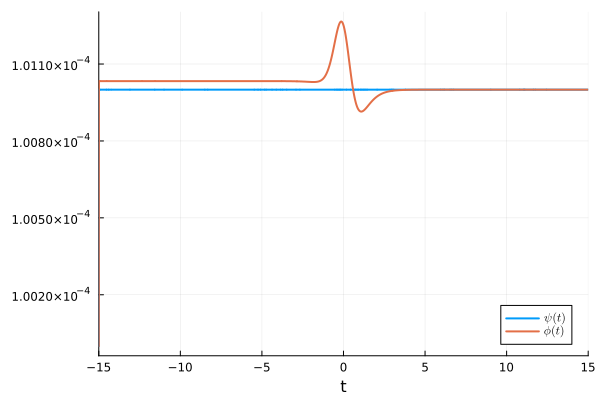

In [63]:
plot(sol, idxs=(0, 1), label=L"ψ(t)", lw=2)
plot!(sol, idxs=(0, 2), label=L"φ(t)", xlabel="t", legend=:best, lw=2)